# JSON Project
****
+ work on exercise to be completed and submitted 
+ data source: http://jsonstudio.com/resources/
****

## imports for Python, Pandas

In [300]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [301]:
%matplotlib inline
import matplotlib.pyplot as plt

In [302]:
pd.set_option('display.max_rows', 100); pd.set_option('display.max_columns', 200)

****
## JSON exercise

Using data in file 'data/world_bank_projects.json',
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Question 1: Find the 10 countries with most projects

In [312]:
# load as Pandas dataframe
df1 = pd.read_json('data/world_bank_projects.json')
# Get top countries by product count
q1_answer = df1.countryshortname.value_counts().head(10)

### Answer to Question 1

In [313]:
# Print Answer
print('Top 10 Countries by Project Count')
q1_answer

Top 10 Countries by Project Count


China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

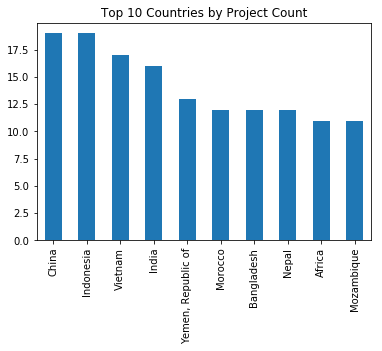

In [314]:
# Plot Answer
q1_answer.plot(kind = 'bar', title = 'Top 10 Countries by Project Count')

### Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [315]:
#Load data as a string
theme_df = json.load((open('data/world_bank_projects.json')))
#Extract major themes
mjtheme = json_normalize(theme_df, 'mjtheme_namecode')
#Get count by major theme
mjtheme_counts = mjtheme.name.value_counts()
#limit to top 10
mjtheme_top10 = mjtheme_counts.head(10)
q2_answer = mjtheme_top10

   

### Answer to Question 2

In [321]:
# Print Answer
print("Top 10 Major Themes by Count w/Missing Name Values")
q2_answer


Top 10 Major Themes by Count w/Missing Name Values


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

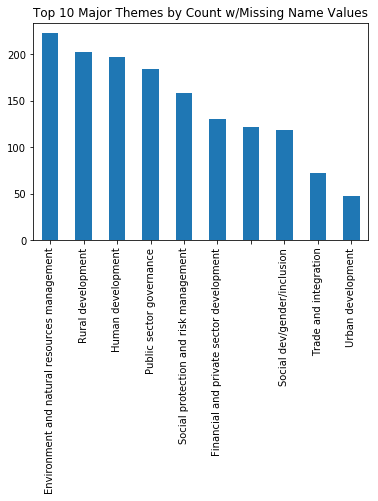

In [322]:
# Plot Answer
q2_answer.plot(kind = 'bar', title = 'Top 10 Major Themes by Count w/Missing Name Values')

### Question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [323]:
# Extract the project name and code
df = json_normalize(theme_df, 'mjtheme_namecode', ['id'])
# Convert to dataframe
df = pd.DataFrame(df)
# Initialize Name column
df['Name'] = ''
# Create list of unique codes
codes = df.code.unique()
# Fill in names
for code in codes:
    df['Name'][(df.code == code)] = df.name.values[(df.code == code) & (df.name != '')][0]
# Get top 10 themes by count
q3_answer = df.Name.value_counts().head(10)

### Answer to Question 3

In [324]:
# Print Answer
print('Top 10 Major Themes by Count')
q3_answer

Top 10 Major Themes by Count


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: Name, dtype: int64

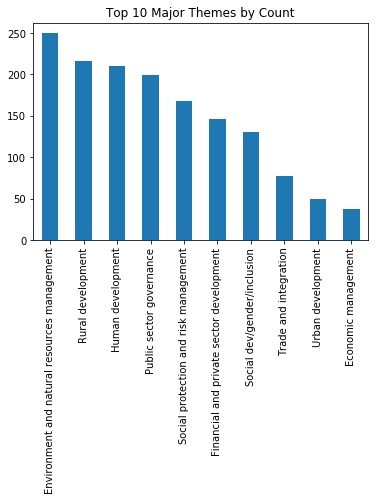

In [325]:
# Plot Answer
q3_answer.plot(kind = 'bar', title = 'Top 10 Major Themes by Count')